In [ ]:
!pip3 install pycocotools>=2.0.1

In [ ]:
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip
!unzip annotations_trainval2017.zip
!rm annotations_trainval2017.zip
!mkdir COCOdataset2017
!mv annotations COCOdataset2017/

/bin/bash: wget: command not found
unzip:  cannot find or open annotations_trainval2017.zip, annotations_trainval2017.zip.zip or annotations_trainval2017.zip.ZIP.
rm: annotations_trainval2017.zip: No such file or directory
mv: rename annotations to COCOdataset2017/annotations: No such file or directory


In [ ]:
from pycocotools.coco import COCO
from tqdm import tqdm_notebook
import urllib.request
import os, cv2
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [ ]:
coco = COCO('COCOdataset2017/annotations/instances_train2017.json')

loading annotations into memory...
Done (t=24.82s)
creating index...
index created!


In [ ]:
# Get all categories
cats = coco.loadCats(coco.getCatIds())

# Print categories
nms=[cat['name'] for cat in cats]
print(f"{len(cats)} categories: \n{', '.join(nms)}")

80 categories: 
person, bicycle, car, motorcycle, airplane, bus, train, truck, boat, traffic light, fire hydrant, stop sign, parking meter, bench, bird, cat, dog, horse, sheep, cow, elephant, bear, zebra, giraffe, backpack, umbrella, handbag, tie, suitcase, frisbee, skis, snowboard, sports ball, kite, baseball bat, baseball glove, skateboard, surfboard, tennis racket, bottle, wine glass, cup, fork, knife, spoon, bowl, banana, apple, sandwich, orange, broccoli, carrot, hot dog, pizza, donut, cake, chair, couch, potted plant, bed, dining table, toilet, tv, laptop, mouse, remote, keyboard, cell phone, microwave, oven, toaster, sink, refrigerator, book, clock, vase, scissors, teddy bear, hair drier, toothbrush


In [ ]:
# Specify classes to download
catIds = coco.getCatIds(catNms=['handbag', 'suitcase'])

# Get images ids
imgIds = coco.getImgIds(catIds=catIds)

# Load images
images = coco.loadImgs(imgIds)

print(len(imgIds))
print("imgIds: ", imgIds[0])
print("images: ", images[0])

787
imgIds:  294914
images:  {'license': 3, 'file_name': '000000294914.jpg', 'coco_url': 'http://images.cocodataset.org/train2017/000000294914.jpg', 'height': 425, 'width': 640, 'date_captured': '2013-11-18 11:18:21', 'flickr_url': 'http://farm4.staticflickr.com/3032/2538554933_c1bef44aab_z.jpg', 'id': 294914}


In [ ]:
im_folder = 'COCOdataset2017/images/train/'

# Download images
for im in tqdm_notebook(images):
    im_path = im_folder + im['file_name']
    if not os.path.exists(im_path):
        urllib.request.urlretrieve(im['coco_url'], im_path)

<ipython-input-8-5db3ad62e00a>:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for im in tqdm_notebook(images):


  0%|          | 0/787 [00:00<?, ?it/s]

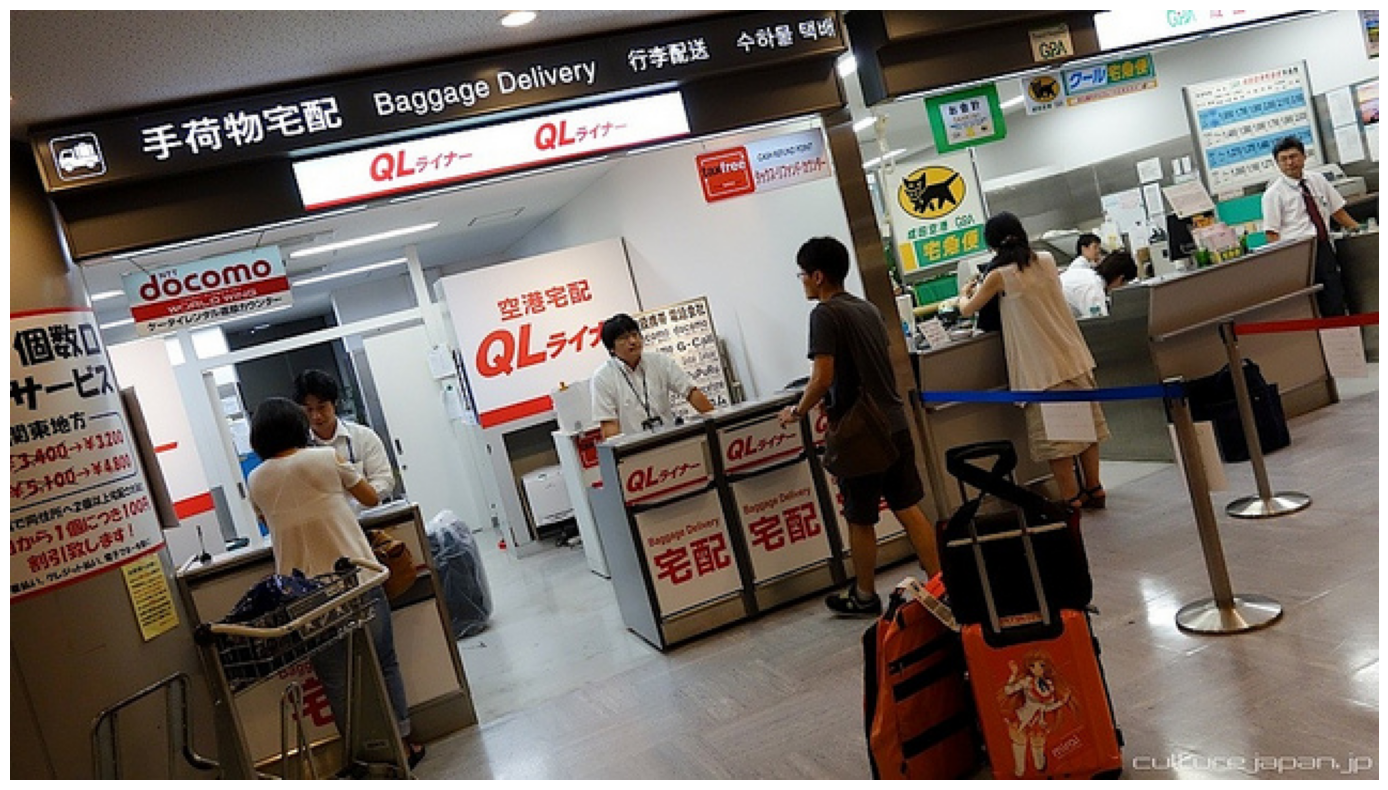

In [ ]:
# Display a random image
img = images[np.random.randint(0, len(imgIds))]
im = cv2.imread(im_folder + img['file_name'])
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.imshow(im), plt.axis('off');

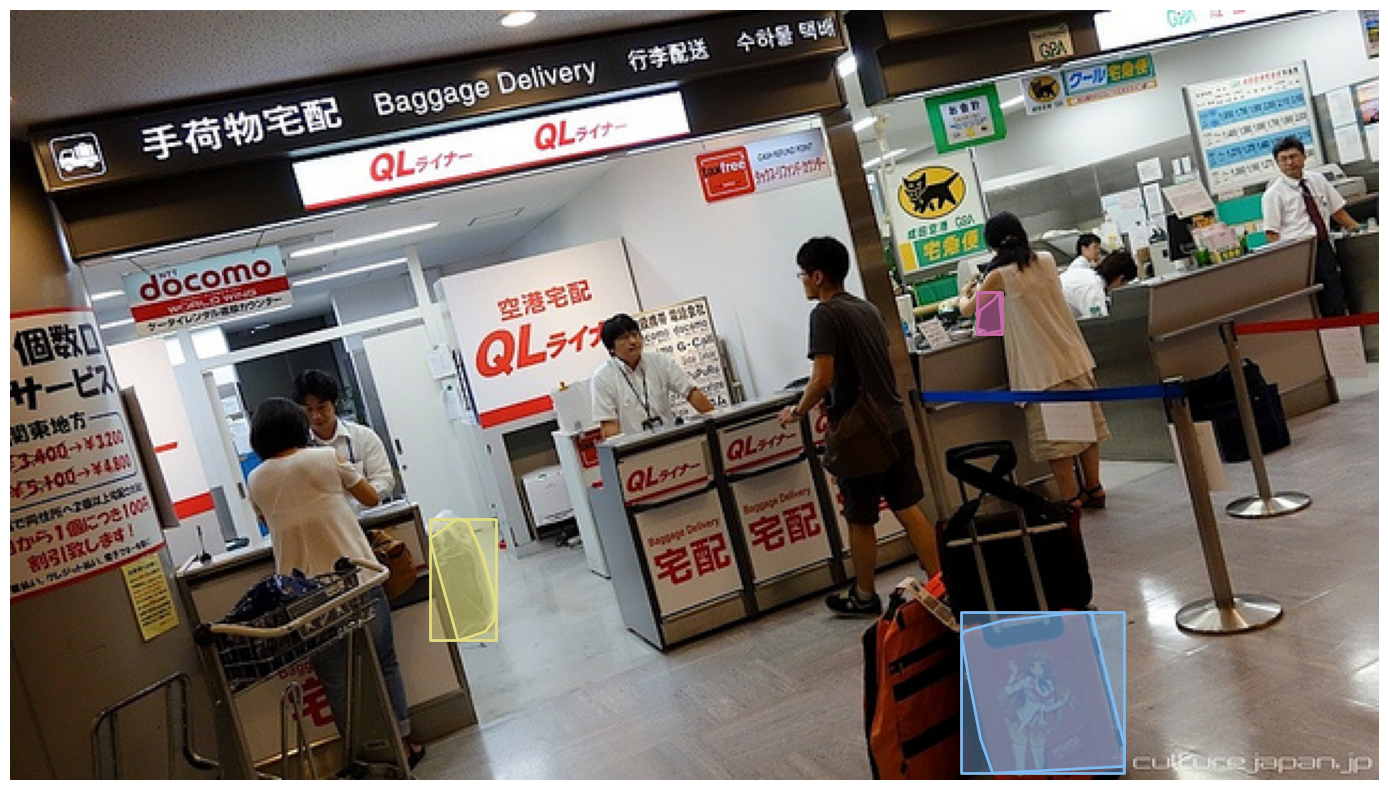

In [ ]:
# Load and display instance annotations
plt.imshow(im); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns, draw_bbox=True)

In [ ]:
[{nms[annot['category_id'] - 1]: annot['bbox']} for annot in anns]

[{'sports ball': [444.32, 280.95, 76.22, 75.4]},
 {'sports ball': [195.75, 237.39, 31.01, 56.8]},
 {'skis': [451.68, 131.48, 11.77, 19.52]}]